# REACHED 85 % ACCURACY

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Session 8'
sys.path.append(workingdir)

In [0]:
%matplotlib inline
import torch
from utils import datapreparation
from utils import display
from model import dnn
from model import resnet
from utils import training
from utils import evaluate

In [4]:
classes, trainloader, testloader = datapreparation.load()

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shape: torch.Size([128, 3, 32, 32])
  cat truck truck   cat   cat


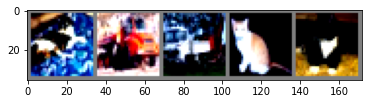

In [5]:
display.show_random_images(trainloader, classes)

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = resnet.ResNet18()
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

In [8]:
EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    training.train_model(model, device, trainloader, optimizer, criterion, epoch)
    training.test_model(model, device, criterion, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.7910935878753662 Batch_id=390 Accuracy=54.31: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0079, Accuracy: 6479/10000 (64.79%)

EPOCH: 2


Loss=0.7642377614974976 Batch_id=390 Accuracy=74.76: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7526/10000 (75.26%)

EPOCH: 3


Loss=0.3954591155052185 Batch_id=390 Accuracy=82.65: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0052, Accuracy: 7729/10000 (77.29%)

EPOCH: 4


Loss=0.3342460095882416 Batch_id=390 Accuracy=88.09: 100%|██████████| 391/391 [00:30<00:00, 12.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7842/10000 (78.42%)

EPOCH: 5


Loss=0.207253098487854 Batch_id=390 Accuracy=91.65: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7843/10000 (78.43%)

EPOCH: 6


Loss=0.1988970935344696 Batch_id=390 Accuracy=94.45: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7799/10000 (77.99%)

EPOCH: 7


Loss=0.18903203308582306 Batch_id=390 Accuracy=96.53: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0090, Accuracy: 7480/10000 (74.80%)

EPOCH: 8


Loss=0.11154423654079437 Batch_id=390 Accuracy=97.60: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 7816/10000 (78.16%)

EPOCH: 9


Loss=0.06921081990003586 Batch_id=390 Accuracy=98.38: 100%|██████████| 391/391 [00:30<00:00, 13.03it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8129/10000 (81.29%)

EPOCH: 10


Loss=0.04857596755027771 Batch_id=390 Accuracy=98.79: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 8141/10000 (81.41%)

EPOCH: 11


Loss=0.09381753951311111 Batch_id=390 Accuracy=99.07: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0077, Accuracy: 7985/10000 (79.85%)

EPOCH: 12


Loss=0.0131809888407588 Batch_id=390 Accuracy=99.13: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8250/10000 (82.50%)

EPOCH: 13


Loss=0.009083884768188 Batch_id=390 Accuracy=99.59: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 8284/10000 (82.84%)

EPOCH: 14


Loss=0.010382759384810925 Batch_id=390 Accuracy=99.81: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 8293/10000 (82.93%)

EPOCH: 15


Loss=0.0002646207867655903 Batch_id=390 Accuracy=99.98: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8425/10000 (84.25%)

EPOCH: 16


Loss=0.00011563301086425781 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8472/10000 (84.72%)

EPOCH: 17


Loss=0.0002913236676249653 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8502/10000 (85.02%)

EPOCH: 18


Loss=0.0005882382392883301 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8487/10000 (84.87%)

EPOCH: 19


Loss=0.0002628684160299599 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8503/10000 (85.03%)

EPOCH: 20


Loss=0.0008346319082193077 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 8508/10000 (85.08%)

EPOCH: 21


Loss=8.834600157570094e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8505/10000 (85.05%)

EPOCH: 22


Loss=6.774663779651746e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8507/10000 (85.07%)

EPOCH: 23


Loss=8.705854270374402e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8502/10000 (85.02%)

EPOCH: 24


Loss=0.0002837061765603721 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8502/10000 (85.02%)

EPOCH: 25


Loss=0.00011198520951438695 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8506/10000 (85.06%)

EPOCH: 26


Loss=0.0008676290744915605 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8496/10000 (84.96%)

EPOCH: 27


Loss=6.239414506126195e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8501/10000 (85.01%)

EPOCH: 28


Loss=0.00035272835521027446 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8499/10000 (84.99%)

EPOCH: 29


Loss=8.91447052708827e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8508/10000 (85.08%)

EPOCH: 30


Loss=3.349781036376953e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 13.05it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8498/10000 (84.98%)

EPOCH: 31


Loss=0.00011225938942516223 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 8506/10000 (85.06%)

EPOCH: 32


Loss=4.0495397115591913e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8501/10000 (85.01%)

EPOCH: 33


Loss=8.565187454223633e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8523/10000 (85.23%)

EPOCH: 34


Loss=5.416870044427924e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8520/10000 (85.20%)

EPOCH: 35


Loss=0.00025163887767121196 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8510/10000 (85.10%)

EPOCH: 36


Loss=0.0003246903361286968 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8506/10000 (85.06%)

EPOCH: 37


Loss=5.0818918680306524e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8496/10000 (84.96%)

EPOCH: 38


Loss=0.0005651712417602539 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 8507/10000 (85.07%)

EPOCH: 39


Loss=2.613067590573337e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 12.99it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8508/10000 (85.08%)

EPOCH: 40


Loss=8.287429955089465e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8505/10000 (85.05%)

EPOCH: 41


Loss=5.931854320806451e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8504/10000 (85.04%)

EPOCH: 42


Loss=3.2949446904240176e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 13.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8506/10000 (85.06%)

EPOCH: 43


Loss=4.31180014857091e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 13.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8504/10000 (85.04%)

EPOCH: 44


Loss=5.434751437860541e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 13.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8510/10000 (85.10%)

EPOCH: 45


Loss=5.254745337879285e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 13.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8504/10000 (85.04%)

EPOCH: 46


Loss=8.393525786232203e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 13.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8512/10000 (85.12%)

EPOCH: 47


Loss=2.8979779017390683e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 13.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0061, Accuracy: 8512/10000 (85.12%)

EPOCH: 48


Loss=4.068612906849012e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:30<00:00, 13.01it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0063, Accuracy: 8508/10000 (85.08%)

EPOCH: 49


Loss=3.6704539525089785e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 8505/10000 (85.05%)

EPOCH: 50


Loss=2.5975703465519473e-05 Batch_id=390 Accuracy=100.00: 100%|██████████| 391/391 [00:29<00:00, 13.07it/s]



Test set: Average loss: 0.0062, Accuracy: 8513/10000 (85.13%)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  horse   car plane   car  deer
Predicted:  horse   car plane   car  deer


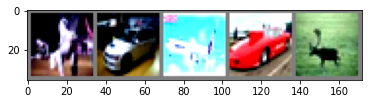

In [9]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [10]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 85 %


In [11]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 86 %
Accuracy of   car : 91 %
Accuracy of  bird : 80 %
Accuracy of   cat : 68 %
Accuracy of  deer : 86 %
Accuracy of   dog : 76 %
Accuracy of  frog : 100 %
Accuracy of horse : 83 %
Accuracy of  ship : 91 %
Accuracy of truck : 93 %
